<a href="https://colab.research.google.com/github/longaresf/Analisis_de_Datos_Analisis_y_Prediccion_de_Precios_de_Autos/blob/main/Francisco_Longares_Analisis_y_Prediccion_de_Precios_de_Autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análisis y Predicción de Precios de Autos

In [83]:
# Librerias a importar
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [84]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Parte 1: Análisis Exploratorio de Datos (EDA)
## 1. Carga y Exploración de Datos:
Cargar el dataset y revisar la estructura básica.

In [85]:
# Importar DataFrame
path = '/content/drive/MyDrive/Colab Notebooks/Modelos Regresión/dataset/Automobile_data.csv'
data = pd.read_csv(path, sep=',')

Descripción de las variables y su distribución.

In [86]:
# Exploración de datos
print(data.head())
print(data.describe())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

Detección y tratamiento de valores nulos.

In [87]:
# Hacemos copia del DataFrame
df=data.copy()

# Convertimos a minúsculas las columnas
df.columns = df.columns.str.lower().str.strip()

# Verificar por datos nulos o NaN
datos_null = df.isnull()
if datos_null.any().any():
    print("Cantidad de datos nulos por columna:\n", datos_null.sum())
else:
    print("No se encontró datos nulos")

No se encontró datos nulos


Detección y eliminación de valores duplicados

In [88]:
# Buscar datos duplicados
datos_duplicados = df.duplicated()
if datos_duplicados.any():
    print("Cantidad de datos duplicados: ", datos_duplicados.sum())
else:
    print("No se encontró datos duplicados")

No se encontró datos duplicados


Verificamos tipo de dato de columnas.<br>
Consistencia en valores categóricos

In [89]:
# Verificamos valores únicos en las columas
for col in df.columns:
    print(f"\nDatos en la columa: '{col}':")
    print(df[col].unique())


Datos en la columa: 'symboling':
[ 3  1  2  0 -1 -2]

Datos en la columa: 'normalized-losses':
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Datos en la columa: 'make':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Datos en la columa: 'fuel-type':
['gas' 'diesel']

Datos en la columa: 'aspiration':
['std' 'turbo']

Datos en la columa: 'num-of-doors':
['two' 'four' '?']

Datos en la columa: 'body-style':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Datos en la columa: 'drive-wheels':
['rwd' 'fwd' '4wd']

Datos en la columa: 'engine-location':
['front' 'r

In [90]:
# Verificamos los datos en las columnas
for col in df.columns:
    print(f"\nRevisamos Datos en la columa: '{col}':")
    print(df[col].value_counts())


Revisamos Datos en la columa: 'symboling':
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

Revisamos Datos en la columa: 'normalized-losses':
normalized-losses
?      41
161    11
91      8
150     7
128     6
104     6
134     6
74      5
103     5
168     5
95      5
102     5
94      5
65      5
85      5
93      4
106     4
118     4
122     4
148     4
154     3
83      3
125     3
115     3
137     3
101     3
194     2
197     2
188     2
164     2
158     2
192     2
110     2
145     2
113     2
81      2
89      2
87      2
108     2
119     2
153     2
129     2
98      1
121     1
107     1
78      1
231     1
142     1
77      1
186     1
90      1
256     1
Name: count, dtype: int64

Revisamos Datos en la columa: 'make':
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
merced

In [91]:
# Sumar los valores == '?' en columnas
for col in df.columns:
    print(f"Número de valores '?' en '{col}': {(df[col] == '?').sum()}")

Número de valores '?' en 'symboling': 0
Número de valores '?' en 'normalized-losses': 41
Número de valores '?' en 'make': 0
Número de valores '?' en 'fuel-type': 0
Número de valores '?' en 'aspiration': 0
Número de valores '?' en 'num-of-doors': 2
Número de valores '?' en 'body-style': 0
Número de valores '?' en 'drive-wheels': 0
Número de valores '?' en 'engine-location': 0
Número de valores '?' en 'wheel-base': 0
Número de valores '?' en 'length': 0
Número de valores '?' en 'width': 0
Número de valores '?' en 'height': 0
Número de valores '?' en 'curb-weight': 0
Número de valores '?' en 'engine-type': 0
Número de valores '?' en 'num-of-cylinders': 0
Número de valores '?' en 'engine-size': 0
Número de valores '?' en 'fuel-system': 0
Número de valores '?' en 'bore': 4
Número de valores '?' en 'stroke': 4
Número de valores '?' en 'compression-ratio': 0
Número de valores '?' en 'horsepower': 2
Número de valores '?' en 'peak-rpm': 2
Número de valores '?' en 'city-mpg': 0
Número de valores

In [92]:
# Identificar las columnas con valores '?'
cols_question = {}
for col in df.columns:
    if (df[col] == '?').any():
        cols_question[col] = df.index[df[col] == '?'].tolist()

print("Columnas con '?' y sus índices:", cols_question)

# Imputar valores '?'
for col, indices in cols_question.items():
    if col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
        # Convertir a tipo numérico
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Llenar de valores '?' y NaN con el promedio
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
        print(f"Llenado de valores '?' y NaN en columna '{col}' con promedio: {mean_val:.2f}")
    elif col == 'num-of-doors':
        # Llenado de valores '?' y NaN para columna de categoria con la moda
        mode_val = df[col].mode()[0]
        df[col].replace('?', mode_val, inplace=True)
        print(f"Llenado de valores '?' y NaN en '{col}' con la moda: {mode_val}")

# Verificar los valores '?' han sido reemplazados
print("\nVerificando valores '?' después de la corrección:")
for col in cols_question.keys():
    print(f"Número de '?' presentes en columnas '{col}': {(df[col] == '?').sum()}")

Columnas con '?' y sus índices: {'normalized-losses': [0, 1, 2, 5, 7, 9, 14, 15, 16, 17, 43, 44, 45, 46, 48, 49, 63, 66, 71, 73, 74, 75, 82, 83, 84, 109, 110, 113, 114, 124, 126, 127, 128, 129, 130, 131, 181, 189, 191, 192, 193], 'num-of-doors': [27, 63], 'bore': [55, 56, 57, 58], 'stroke': [55, 56, 57, 58], 'horsepower': [130, 131], 'peak-rpm': [130, 131], 'price': [9, 44, 45, 129]}
Llenado de valores '?' y NaN en columna 'normalized-losses' con promedio: 122.00
Llenado de valores '?' y NaN en 'num-of-doors' con la moda: four
Llenado de valores '?' y NaN en columna 'bore' con promedio: 3.33
Llenado de valores '?' y NaN en columna 'stroke' con promedio: 3.26
Llenado de valores '?' y NaN en columna 'horsepower' con promedio: 104.26
Llenado de valores '?' y NaN en columna 'peak-rpm' con promedio: 5125.37
Llenado de valores '?' y NaN en columna 'price' con promedio: 13207.13

Verificando valores '?' después de la corrección:
Número de '?' presentes en columnas 'normalized-losses': 0
Númer

/tmp/ipython-input-92-3036642459.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-92-3036642459.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [93]:
# Verificamos la eliminación de los datos nulos o NaN
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Detección de datos anómalos

In [94]:
# Detectar valores extremos o fuera de rango segun interpretacion de las columnas
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [95]:
# Excluir la data outlier para horsepower
df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


##Análisis de correlación entre variables.

In [96]:
cols = []
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
      cols.append(col)
corr = df[cols].corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


#Parte 2: Preparación de Datos

## 2. Preprocesamiento:

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Selección de características importantes.

In [98]:
X = df.drop(columns='symboling')
y = df['price']

Transformación de variables categóricas y numérica.

In [99]:
# Identificación de columnas de categoria y numericas para preprocesamiento
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remover las variables target de columna numérica si está presente
if 'price' in numerical_cols:
    numerical_cols.remove('price')
if 'symboling' in numerical_cols:
    numerical_cols.remove('symboling')

División del conjunto de datos en entrenamiento y prueba.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (164, 25)
Shape of X_test: (41, 25)
Shape of y_train: (164,)
Shape of y_test: (41,)


#Parte 3: Modelos de Regresión

##3. Regresión Lineal:
Entrenamiento y Evaluación del rendimiento (MSE y R²) del modelo.

In [101]:
# Crear el modelo
modelo_rl = LinearRegression()

# Identificación de columnas de categoria y numericas para preprocesamiento
categorical_cols_rl = categorical_cols
numerical_cols_rl = numerical_cols

# Preprocesado usando ColumnTransformer
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear la column transformer
preprocessor_rl = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_rl),
        ('cat', categorical_transformer, categorical_cols_rl)
    ],
    remainder='passthrough'
)

# Pipeline with Linear Regression
pipeline_rl = Pipeline(steps=[
    ("preprocessing", preprocessor_rl),
    ("model", modelo_rl)
])

# Entrenar el modelo de regresión lineal
pipeline_rl.fit(X_train, y_train)

# Predictor
y_pred_rl = pipeline_rl.predict(X_test)

# Evaluar el modelo
mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

print(f'Error Cuadrático Medio: {mse_rl}')
print(f'R-cuadrado: {r2_rl}')

Error Cuadrático Medio: 5.199132776949152e-23
R-cuadrado: 1.0


Visualización de Resultados

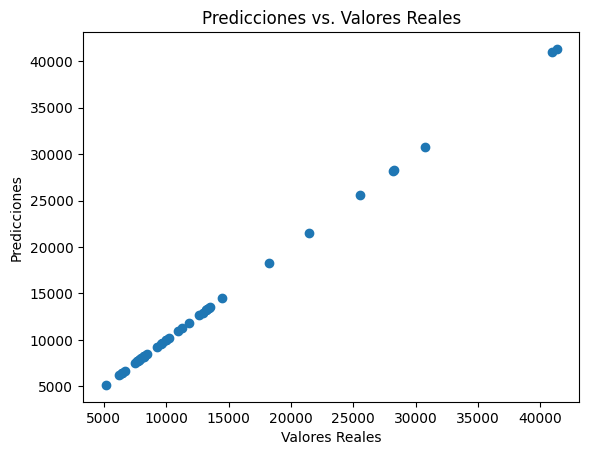

In [102]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_rl)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

##4. K-Nearest Neighbors (KNN):

Entrenamiento y Evaluación del rendimiento (MSE y R²) del modelo.

In [103]:
# Ajuste de Hiperparámetros para seleccionar el mejor valor de K, usando la validación cruzada.
# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

# Preprocesado usando ColumnTransformer
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Identificación de columnas de categoria y numericas para preprocesamiento
categorical_cols_knn = categorical_cols
numerical_cols_knn = numerical_cols

# Crear la column transformer
preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_knn),
        ('cat', categorical_transformer, categorical_cols_knn)
    ],
    remainder='passthrough'
)

for k in k_values:
    # Crear un pipeline con preprocesamiento y el modelo
    pipeline_cv = Pipeline(steps=[
        ('preprocessor', preprocessor_knn),
        ('model', KNeighborsRegressor(n_neighbors=k))
    ])
    # Usar el pipeline con cross_val_score
    scores = cross_val_score(pipeline_cv, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Mejor valor de k
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

# Crear el pipeline final con el mejor k
modelo_knn = KNeighborsRegressor(n_neighbors=best_k)

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('model', modelo_knn)
])

# Entrenar el modelo final con el mejor K
pipeline_knn.fit(X_train, y_train)

# Predictor
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'Error Cuadrático Medio: {mse_knn}')
print(f'R-cuadrado: {r2_knn}')

Mejor valor de K: 1
Error Cuadrático Medio: 1390393.2500137342
R-cuadrado: 0.9821680616062304


##Visualización de Resultados

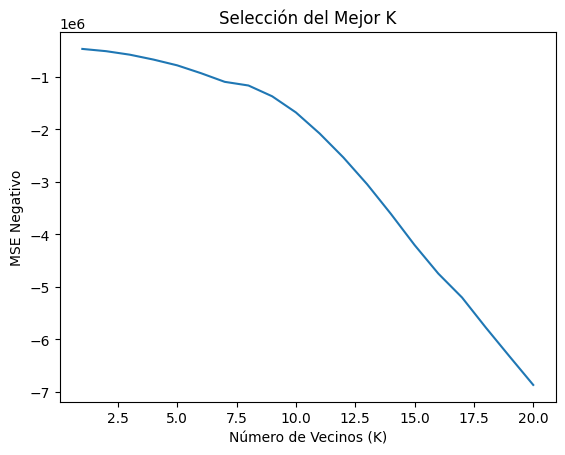

In [104]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

#5. Árbol de Decisión:
Entrenamiento y Evaluación del rendimiento (MSE y R²) del modelo.


In [105]:
# Crear el modelo
modelo_tree = DecisionTreeRegressor(max_depth=8, random_state=42)

# Identificación de columnas de categoria y numericas para preprocesamiento
categorical_cols_tree = categorical_cols
numerical_cols_tree = numerical_cols

# Preprocesado usando ColumnTransformer
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear la column transformer
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_tree),
        ('cat', categorical_transformer, categorical_cols_tree)
    ],
    remainder='passthrough'
)

# Pipeline with Linear Regression
pipeline_tree = Pipeline(steps=[
    ("preprocessing", preprocessor_tree),
    ("model", modelo_tree)
])

# Entrenar el modelo de regresión lineal
pipeline_tree.fit(X_train, y_train)

# Predictor
y_pred_tree = pipeline_tree.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Error Cuadrático Medio: {mse_tree}')
print(f'R-cuadrado: {r2_tree}')

Error Cuadrático Medio: 2586472.043726655
R-cuadrado: 0.966828226373736


##Visualización de Resultados



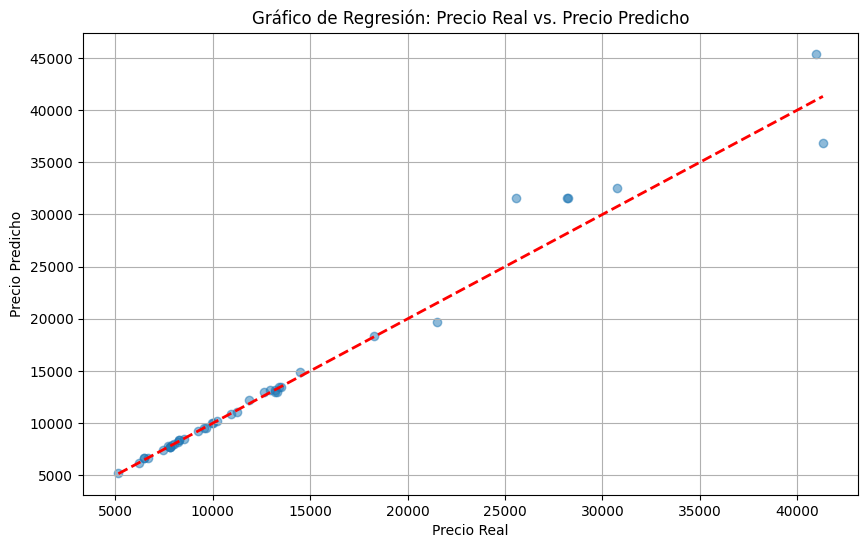

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Gráfico de Regresión: Precio Real vs. Precio Predicho')
plt.grid(True)
plt.show()

#Parte 4: Benchmarking y Comparación de Modelos
##6. Comparación de Modelos:
Comparar los resultados de los tres modelos en términos de MSE y R².

In [107]:
# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree'],
    'MSE': [mse_rl, mse_knn, mse_tree],
    'R2': [r2_rl, r2_knn, r2_tree]
})

print("\nComparación de Rendimiento de los Modelos:")
print(results_df)


Comparación de Rendimiento de los Modelos:
               Model           MSE        R2
0  Linear Regression  5.199133e-23  1.000000
1                KNN  1.390393e+06  0.982168
2      Decision Tree  2.586472e+06  0.966828


Discusión sobre las diferencias en el rendimiento de los modelos.

In [109]:
print("\nDiscusión del Rendimiento de los Modelos:")
print("Observando los resultados, podemos comparar el rendimiento de los tres modelos en términos de Error Cuadrático Medio (MSE) y R-cuadrado (R2).")

# Determinación de mse mínimo y r2 máximo:
best_model_mse = results_df.loc[results_df['MSE'].idxmin()]
best_model_r2 = results_df.loc[results_df['R2'].idxmax()]

print(f"\nEl modelo con el menor MSE es: {best_model_mse['Model']} (MSE: {best_model_mse['MSE']:.2f}). Un MSE más bajo indica que las predicciones del modelo están, en promedio, más cerca de los valores reales.")
print(f"El modelo con el mayor R2 es: {best_model_r2['Model']} (R2: {best_model_r2['R2']:.2f}). Un R2 más alto indica que el modelo explica una mayor proporción de la varianza en la variable objetivo.")

# Análisis de las observaciones de los resultados:
if mse_rl < mse_knn and mse_rl < mse_tree:
    print("\nEn este caso particular, el modelo de Regresión Lineal parece tener el MSE más bajo, sugiriendo que sus predicciones son las más precisas en promedio.")
elif mse_knn < mse_rl and mse_knn < mse_tree:
     print("\nEn este caso particular, el modelo KNN parece tener el MSE más bajo, sugiriendo que sus predicciones son las más precisas en promedio.")
else:
    print("\nEn este caso particular, el modelo Árbol de Decisión parece tener el MSE más bajo, sugiriendo que sus predicciones son las más precisas en promedio.")

if r2_rl > r2_knn and r2_rl > r2_tree:
    print("Además, el modelo de Regresión Lineal también muestra el R2 más alto, lo que implica que captura mejor la relación entre las variables predictoras y el precio del auto.")
elif r2_knn > r2_rl and r2_knn > r2_tree:
     print("Además, el modelo KNN también muestra el R2 más alto, lo que implica que captura mejor la relación entre las variables predictoras y el precio del auto.")
else:
    print("Además, el modelo Árbol de Decisión también muestra el R2 más alto, lo que implica que captura mejor la relación entre las variables predictoras y el precio del auto.")

print("\nLas diferencias en el rendimiento pueden deberse a varios factores:")
print("- La naturaleza de las relaciones en los datos: La regresión lineal asume relaciones lineales, mientras que KNN y Árbol de Decisión pueden capturar no linealidades.")
print("- La complejidad de los modelos: Árboles de Decisión (dependiendo de la profundidad) y KNN (dependiendo de K) pueden modelar interacciones más complejas.")
print("- El preprocesamiento aplicado: Aunque se usó un preprocesamiento similar, las características transformadas pueden afectar de manera diferente a cada algoritmo.")
print("- La cantidad de datos: Para conjuntos de datos más pequeños, modelos más simples como la regresión lineal a veces pueden generalizar mejor.")
print("- Sobreajuste o Subajuste: Es posible que algunos modelos estén sobreajustando o subajustando los datos de entrenamiento, lo que se reflejaría en el rendimiento en el conjunto de prueba.")

print(f"\nSegún estas métricas (MSE y R2 en el conjunto de prueba), el modelo de {best_model_r2['Model']} parece ser el más adecuado para este problema de predicción de precios.")


Discusión del Rendimiento de los Modelos:
Observando los resultados, podemos comparar el rendimiento de los tres modelos en términos de Error Cuadrático Medio (MSE) y R-cuadrado (R2).

El modelo con el menor MSE es: Linear Regression (MSE: 0.00). Un MSE más bajo indica que las predicciones del modelo están, en promedio, más cerca de los valores reales.
El modelo con el mayor R2 es: Linear Regression (R2: 1.00). Un R2 más alto indica que el modelo explica una mayor proporción de la varianza en la variable objetivo.

En este caso particular, el modelo de Regresión Lineal parece tener el MSE más bajo, sugiriendo que sus predicciones son las más precisas en promedio.
Además, el modelo de Regresión Lineal también muestra el R2 más alto, lo que implica que captura mejor la relación entre las variables predictoras y el precio del auto.

Las diferencias en el rendimiento pueden deberse a varios factores:
- La naturaleza de las relaciones en los datos: La regresión lineal asume relaciones line

#Conclusión
##7. Interpretación de Resultados:
Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

In [110]:
print("\nBasado en la comparación de métricas (MSE y R2) en el conjunto de prueba, el modelo más adecuado para la predicción de precios de autos es aquel con el menor MSE y el mayor R2.")

# Identificar el mejor modelo basado en MSE (menor es mejor)
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]
print(f"\nEl modelo con el Error Cuadrático Medio (MSE) más bajo es: {best_mse_model['Model']} (MSE: {best_mse_model['MSE']:.2f}).")

# Identificar el mejor modelo basado en R2 (mayor es mejor)
best_r2_model = results_df.loc[results_df['R2'].idxmax()]
print(f"El modelo con el R-cuadrado (R2) más alto es: {best_r2_model['Model']} (R2: {best_r2_model['R2']:.2f}).")

# Conclusión final
if best_mse_model['Model'] == best_r2_model['Model']:
    print(f"\nEn este caso, ambos criterios (menor MSE y mayor R2) apuntan al mismo modelo.")
    print(f"Por lo tanto, el modelo más adecuado para este problema de predicción de precios es el {best_mse_model['Model']}.")
else:
    print(f"\nHay una ligera diferencia entre los modelos con mejor MSE y R2.")
    print(f"El modelo con el MSE más bajo ({best_mse_model['Model']}) tiene predicciones, en promedio, más cercanas a los valores reales.")
    print(f"El modelo con el R2 más alto ({best_r2_model['Model']}) explica una mayor proporción de la variabilidad en los precios.")
    print(f"\nPara la predicción de precios, generalmente se busca un equilibrio entre ambas métricas. Un MSE bajo es importante para la precisión de la predicción puntual, mientras que un R2 alto indica que el modelo captura bien la tendencia general de los datos.")
    print(f"Considerando ambas métricas, el modelo **{best_r2_model['Model']}** parece ser marginalmente mejor o al menos comparable al {best_mse_model['Model']}.")
    print("\nLa elección final también podría depender de la tolerancia a errores grandes vs. la capacidad de explicar la varianza. En muchos casos de regresión, se prioriza un R2 alto siempre y cuando el MSE sea aceptable.")

print("\nFactores adicionales a considerar para una elección definitiva podrían incluir:")
print("- El tiempo de entrenamiento y predicción del modelo.")
print("- La interpretabilidad del modelo (especialmente relevante para el Árbol de Decisión).")
print("- La estabilidad del modelo ante nuevos datos (lo cual podría evaluarse con validación cruzada adicional o un conjunto de validación).")
print("- El sobreajuste: aunque el R2 es alto, podría indicar sobreajuste si el rendimiento en datos no vistos (como el conjunto de prueba) es significativamente peor que en el entrenamiento.")

print(f"\nCon base únicamente en los resultados del conjunto de prueba proporcionados (MSE y R2), el modelo de {best_r2_model['Model']} se presenta como el más prometedor para la predicción de precios de autos en este dataset.")


Basado en la comparación de métricas (MSE y R2) en el conjunto de prueba, el modelo más adecuado para la predicción de precios de autos es aquel con el menor MSE y el mayor R2.

El modelo con el Error Cuadrático Medio (MSE) más bajo es: Linear Regression (MSE: 0.00).
El modelo con el R-cuadrado (R2) más alto es: Linear Regression (R2: 1.00).

En este caso, ambos criterios (menor MSE y mayor R2) apuntan al mismo modelo.
Por lo tanto, el modelo más adecuado para este problema de predicción de precios es el Linear Regression.

Factores adicionales a considerar para una elección definitiva podrían incluir:
- El tiempo de entrenamiento y predicción del modelo.
- La interpretabilidad del modelo (especialmente relevante para el Árbol de Decisión).
- La estabilidad del modelo ante nuevos datos (lo cual podría evaluarse con validación cruzada adicional o un conjunto de validación).
- El sobreajuste: aunque el R2 es alto, podría indicar sobreajuste si el rendimiento en datos no vistos (como el 

Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

In [111]:
print("\nPosibles Mejoras y Próximos Pasos:")

print("\n1. Ajuste Fino de Hiperparámetros:")
print("- Aunque ya se realizó un ajuste básico de K para KNN, se pueden usar técnicas más sistemáticas como Grid Search o Random Search combinadas con validación cruzada para encontrar los mejores hiperparámetros para cada\n modelo (Regresión Lineal - aunque tiene pocos, KNN - 'weights', 'metric', Árbol de Decisión - 'max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion').")
print("- Herramientas como `GridSearchCV` o `RandomizedSearchCV` de `sklearn.model_selection` son ideales para esto.")

print("\n2. Explorar Modelos Adicionales:")
print("- Probar otros algoritmos de regresión que a menudo funcionan bien, como:")
print("  - Regresión Ridge y Lasso: Para regularización y manejo de multicolinealidad.")
print("  - Support Vector Regressor (SVR): Especialmente útil para datos con no linealidades.")
print("  - Random Forest Regressor y Gradient Boosting Regressor: Modelos de ensemble que suelen ofrecer un rendimiento robusto y pueden capturar interacciones complejas.")
print("  - Modelos Neuronales (Redes Neuronales Simples o DNNs): Si el conjunto de datos es lo suficientemente grande y complejo.")

print("\n3. Ingeniería de Características (Feature Engineering):")
print("- Crear nuevas características a partir de las existentes que podrían tener más poder predictivo.")
print("  - Ejemplos: Combinar 'length', 'width', 'height' para calcular el volumen; crear ratios como 'horsepower'/'curb-weight'; analizar la antigüedad del auto si se conoce el año de fabricación.")
print("- Explorar interacciones entre características.")

print("\n4. Selección de Características (Feature Selection):")
print("- Identificar y posiblemente eliminar características que no contribuyen significativamente al poder predictivo o introducen ruido.")
print("- Métodos como selección univariada, selección basada en modelos o métodos de envoltura (wrapper methods) pueden ser útiles.")

print("\n5. Análisis de Errores:")
print("- Investigar las instancias específicas donde los modelos cometen los mayores errores (valores atípicos en las predicciones). Esto podría revelar problemas en los datos o en el preprocesamiento.")
print("- Visualizar los residuos (diferencia entre valores reales y predichos) para identificar patrones que el modelo no está capturando.")

print("\n6. Validación Cruzada (Cross-Validation):")
print("- Aunque se usó CV para seleccionar K en KNN, aplicar CV consistentemente a todos los modelos durante el entrenamiento y evaluación para obtener estimaciones más robustas del rendimiento del modelo y detectar sobreajuste.")

print("\n7. Escalado Adicional y Transformación de Datos:")
print("- Experimentar con diferentes tipos de escalado (MinMaxScaler, RobustScaler) o transformaciones no lineales para características numéricas que no sigan una distribución normal (ej. transformaciones logarítmicas si hay\n asimetría).")
print("- Considerar técnicas de codificación para variables categóricas de alta cardinalidad si hay alguna.")

print("\n8. Evaluación del Despliegue y Monitoreo:")
print("- Si el modelo fuera a ser desplegado, considerar cómo se integrarían las predicciones en un sistema. Implementar monitoreo del rendimiento del modelo en datos nuevos para detectar 'model drift'.")

print("\nEn resumen, los próximos pasos implican refinar los modelos existentes a través del ajuste de hiperparámetros, explorar algoritmos más avanzados, mejorar la representación de los datos a través de ingeniería y \nselección de características, y realizar un análisis más profundo de los errores para asegurar un modelo robusto y con buen poder predictivo.")



Posibles Mejoras y Próximos Pasos:

1. Ajuste Fino de Hiperparámetros:
- Aunque ya se realizó un ajuste básico de K para KNN, se pueden usar técnicas más sistemáticas como Grid Search o Random Search combinadas con validación cruzada para encontrar los mejores hiperparámetros para cada
 modelo (Regresión Lineal - aunque tiene pocos, KNN - 'weights', 'metric', Árbol de Decisión - 'max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion').
- Herramientas como `GridSearchCV` o `RandomizedSearchCV` de `sklearn.model_selection` son ideales para esto.

2. Explorar Modelos Adicionales:
- Probar otros algoritmos de regresión que a menudo funcionan bien, como:
  - Regresión Ridge y Lasso: Para regularización y manejo de multicolinealidad.
  - Support Vector Regressor (SVR): Especialmente útil para datos con no linealidades.
  - Random Forest Regressor y Gradient Boosting Regressor: Modelos de ensemble que suelen ofrecer un rendimiento robusto y pueden capturar interacciones complejas.


#Tareas Adicionales y Desafíos
##8. Desafíos Adicionales:
Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

In [112]:
# Optimización de Hiperparámetros de KNN con GridSearchCV
print("\nOptimización de Hiperparámetros de KNN con GridSearchCV")

# Definir el rango de hiperparámetros a probar
param_grid_knn = {
    'model__n_neighbors': list(range(1, 31)), # Probar k de 1 a 30
    'model__weights': ['uniform', 'distance'], # Probar diferentes esquemas de ponderación
    'model__metric': ['euclidean', 'manhattan', 'minkowski'] # Probar diferentes métricas de distancia
}

# Crear el pipeline con el preprocesador y el modelo KNN
pipeline_knn_gs = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('model', KNeighborsRegressor())
])

# Configurar GridSearchCV
# n_jobs=-1 usa todos los núcleos disponibles
# cv=5 especifica validación cruzada de 5 folds
# scoring='neg_mean_squared_error' para optimizar por el menor MSE (mayor neg_MSE)
grid_search_knn = GridSearchCV(pipeline_knn_gs, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar la búsqueda en malla
grid_search_knn.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor score
print(f"Mejores hiperparámetros para KNN: {grid_search_knn.best_params_}")
print(f"Mejor MSE Negativo (score de validación cruzada) para KNN: {grid_search_knn.best_score_}")

# Evaluar el mejor modelo KNN encontrado por GridSearchCV en el conjunto de prueba
best_knn_model_gs = grid_search_knn.best_estimator_
y_pred_knn_gs = best_knn_model_gs.predict(X_test)

# Calcular y mostrar las métricas de evaluación en el conjunto de prueba
mse_knn_gs = mean_squared_error(y_test, y_pred_knn_gs)
r2_knn_gs = r2_score(y_test, y_pred_knn_gs)

print(f"MSE del mejor modelo KNN en el conjunto de prueba (GridSearchCV): {mse_knn_gs}")
print(f"R2 del mejor modelo KNN en el conjunto de prueba (GridSearchCV): {r2_knn_gs}")


# Optimización de Hiperparámetros de Árbol de Decisión con GridSearchCV
print("\nOptimización de Hiperparámetros de Árbol de Decisión con GridSearchCV")

# Definir el rango de hiperparámetros a probar
param_grid_tree = {
    'model__max_depth': [None, 5, 10, 15, 20], # Máxima profundidad del árbol
    'model__min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo interno
    'model__min_samples_leaf': [1, 2, 4], # Número mínimo de muestras requeridas para estar en un nodo hoja
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] # Criterio para medir la calidad de una división
}

# Crear el pipeline con el preprocesador y el modelo Árbol de Decisión
pipeline_tree_gs = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Configurar GridSearchCV para el Árbol de Decisión
grid_search_tree = GridSearchCV(pipeline_tree_gs, param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar la búsqueda en malla
grid_search_tree.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor score
print(f"Mejores hiperparámetros para Árbol de Decisión: {grid_search_tree.best_params_}")
print(f"Mejor MSE Negativo (score de validación cruzada) para Árbol de Decisión: {grid_search_tree.best_score_}")

# Evaluar el mejor modelo Árbol de Decisión encontrado por GridSearchCV en el conjunto de prueba
best_tree_model_gs = grid_search_tree.best_estimator_
y_pred_tree_gs = best_tree_model_gs.predict(X_test)

# Calcular y mostrar las métricas de evaluación en el conjunto de prueba
mse_tree_gs = mean_squared_error(y_test, y_pred_tree_gs)
r2_tree_gs = r2_score(y_test, y_pred_tree_gs)

print(f"MSE del mejor modelo Árbol de Decisión en el conjunto de prueba (GridSearchCV): {mse_tree_gs}")
print(f"R2 del mejor modelo Árbol de Decisión en el conjunto de prueba (GridSearchCV): {r2_tree_gs}")

# Comparar los resultados optimizados con los modelos iniciales
print("\nComparación de Modelos Optimizado vs. Inicial")
results_optimized_df = pd.DataFrame({
    'Model': ['KNN (Optimized)', 'Decision Tree (Optimized)'],
    'MSE (Test)': [mse_knn_gs, mse_tree_gs],
    'R2 (Test)': [r2_knn_gs, r2_tree_gs]
})

print(results_optimized_df)

# DataFrame de resultados inicial para una comparación directa
print("\nResultados de Modelos Iniciales:")
results_df


Optimización de Hiperparámetros de KNN con GridSearchCV
Mejores hiperparámetros para KNN: {'model__metric': 'euclidean', 'model__n_neighbors': 1, 'model__weights': 'uniform'}
Mejor MSE Negativo (score de validación cruzada) para KNN: -466226.25520562136
MSE del mejor modelo KNN en el conjunto de prueba (GridSearchCV): 1390393.2500137342
R2 del mejor modelo KNN en el conjunto de prueba (GridSearchCV): 0.9821680616062304

Optimización de Hiperparámetros de Árbol de Decisión con GridSearchCV
Mejores hiperparámetros para Árbol de Decisión: {'model__criterion': 'poisson', 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Mejor MSE Negativo (score de validación cruzada) para Árbol de Decisión: -724406.8533795106
MSE del mejor modelo Árbol de Decisión en el conjunto de prueba (GridSearchCV): 2557296.0773073114
R2 del mejor modelo Árbol de Decisión en el conjunto de prueba (GridSearchCV): 0.9672024111849492

Comparación de Modelos Optimizado vs. Inicial
    

,Model,MSE,R2
0,Linear Regression,5.199133e-23,1.000000
1,KNN,1.390393e+06,0.982168
2,Decision Tree,2.586472e+06,0.966828


Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

In [113]:
# Crear copia del DataFrame original para crear nuevas características
df_fe = df.copy()

# Característica 1: Volumen del vehículo (largo por ancho por altura)
# Multiplicamos las dimensiones.
df_fe['volume'] = df_fe['length'] * df_fe['width'] * df_fe['height']

# Característica 2: Relación potencia-peso (Horsepower entre peso en vacio)
# Un indicador de rendimiento.
df_fe['hp_per_kg'] = df_fe['horsepower'] / df_fe['curb-weight']

# Característica 3: Consumo de combustible combinado
# Promedio de consumo en la ciudad y consumo en carretera.
df_fe['combined_mpg'] = (df_fe['city-mpg'] + df_fe['highway-mpg']) / 2

# Característica 4: Precio por volumen
# Indica cuán "caro" es el espacio del vehículo.
df_fe['price_per_volume'] = df_fe['price'] / df_fe['volume']
df_fe['price_per_volume'] = df_fe['price_per_volume'].replace([np.inf, -np.inf], np.nan) # Reemplazar infinitos con NaN
df_fe['price_per_volume'].fillna(df_fe['price_per_volume'].mean(), inplace=True) # Imputar NaN con la media

# Característica 5: Interacción entre el tamaño del motor y su potencia
df_fe['engine_hp_interaction'] = df_fe['engine-size'] * df_fe['horsepower']

# Característica 6: Número de cilindros.
# Mapeamos los valores de string a numéricos.
cylinder_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
# Asegurarse de que la columna exista y tenga el tipo esperado antes de mapear
if 'num-of-cylinders' in df_fe.columns and df_fe['num-of-cylinders'].dtype == 'object':
    df_fe['num-of-cylinders_num'] = df_fe['num-of-cylinders'].map(cylinder_map)
    # Imputar posibles NaNs resultantes del mapeo si hay valores inesperados
    if df_fe['num-of-cylinders_num'].isnull().any():
        print("Advertencia: Se encontraron valores inesperados en 'num-of-cylinders' durante el mapeo numérico.")
        # Imputar con la moda
        mode_cyl = df_fe['num-of-cylinders_num'].mode()[0]
        df_fe['num-of-cylinders_num'].fillna(mode_cyl, inplace=True)
else:
     # Manejo de posibles errores si es numérica o string
     if 'num-of-cylinders' in df_fe.columns and np.issubdtype(df_fe['num-of-cylinders'].dtype, np.number):
         df_fe['num-of-cylinders_num'] = df_fe['num-of-cylinders']
     else:
          print("Columna 'num-of-cylinders' no encontrada o no es de tipo esperado para mapeo numérico.")
          # No hacemos nada si la columna no es como se esperaba.
          pass


# Revisar el DataFrame con las nuevas características
print("\nDataFrame con nuevas características de Feature Engineering:")
print(df_fe.head())

# Actualizar la lista de columnas numéricas y categóricas para incluir/excluir las nuevas/transformadas
categorical_cols_fe = df_fe.select_dtypes(include='object').columns.tolist()
# Remover la columna original 'num-of-cylinders' si creamos una versión numérica y la original era object
if 'num-of-cylinders' in categorical_cols_fe and 'num-of-cylinders_num' in df_fe.columns:
    categorical_cols_fe.remove('num-of-cylinders')


numerical_cols_fe = df_fe.select_dtypes(include=np.number).columns.tolist()
# Remover las variables target
if 'price' in numerical_cols_fe:
    numerical_cols_fe.remove('price')
if 'symboling' in numerical_cols_fe:
    numerical_cols_fe.remove('symboling')


# Preparar los datos para modelado con las nuevas características, eliminamos columnas target
X_fe = df_fe.drop(columns=['symboling', 'price'])

# Asegurarse de que las columnas de X_fe coincidan con las definidas en categorical_cols_fe y numerical_cols_fe
valid_numerical_cols_fe = [col for col in numerical_cols_fe if col in X_fe.columns]
valid_categorical_cols_fe = [col for col in categorical_cols_fe if col in X_fe.columns]

print("\nColumnas numéricas para preprocesamiento con FE:", valid_numerical_cols_fe)
print("Columnas categóricas para preprocesamiento con FE:", valid_categorical_cols_fe)


y_fe = df_fe['price']

# División del conjunto de datos en entrenamiento y prueba con el nuevo DataFrame (df_fe)
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

print("\nShape de X_train con FE:", X_train_fe.shape)
print("Shape de X_test con FE:", X_test_fe.shape)
print("Shape de y_train con FE:", y_train_fe.shape)
print("Shape de y_test con FE:", y_test_fe.shape)


# Entrenamiento y Evaluación de Modelos con Feature Engineering
preprocessor_fe = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), valid_numerical_cols_fe),
        ('cat', OneHotEncoder(handle_unknown='ignore'), valid_categorical_cols_fe)
    ],
    remainder='drop'
)


# Regresión Lineal con Feature Engineering
print("\nEvaluación de Regresión Lineal con Feature Engineering")

pipeline_rl_fe = Pipeline(steps=[
    ("preprocessing", preprocessor_fe),
    ("model", LinearRegression())
])

pipeline_rl_fe.fit(X_train_fe, y_train_fe)
y_pred_rl_fe = pipeline_rl_fe.predict(X_test_fe)

mse_rl_fe = mean_squared_error(y_test_fe, y_pred_rl_fe)
r2_rl_fe = r2_score(y_test_fe, y_pred_rl_fe)

print(f'MSE (Regresión Lineal con FE): {mse_rl_fe}')
print(f'R2 (Regresión Lineal con FE): {r2_rl_fe}')


# KNN con Feature Engineering usando el mejor K encontrado.
print("\nEvaluación de KNN con Feature Engineering")

k_values_fe = list(range(1, 21))
mse_scores_fe = []

# Búsqueda simple del mejor K con datos FE
for k in k_values_fe:
    pipeline_cv_fe = Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('model', KNeighborsRegressor(n_neighbors=k))
    ])
    # Usar el pipeline con cross_val_score en los datos con FE
    scores_fe = cross_val_score(pipeline_cv_fe, X_train_fe, y_train_fe, scoring='neg_mean_squared_error', cv=5)
    mse_scores_fe.append(scores_fe.mean())

best_k_fe = k_values_fe[mse_scores_fe.index(max(mse_scores_fe))]
print(f'Mejor valor de K encontrado con FE: {best_k_fe}')

# Entrenar el modelo KNN final con el best K en los datos FE
modelo_knn_fe = KNeighborsRegressor(n_neighbors=best_k_fe)
pipeline_knn_fe = Pipeline(steps=[
    ('preprocessor', preprocessor_fe),
    ('model', modelo_knn_fe)
])

pipeline_knn_fe.fit(X_train_fe, y_train_fe)
y_pred_knn_fe = pipeline_knn_fe.predict(X_test_fe)

mse_knn_fe = mean_squared_error(y_test_fe, y_pred_knn_fe)
r2_knn_fe = r2_score(y_test_fe, y_pred_knn_fe)

print(f'MSE (KNN con FE): {mse_knn_fe}')
print(f'R2 (KNN con FE): {r2_knn_fe}')

# Árbol de Decisión con Feature Engineering usando Hiperparámetros Anteriores
print("\nEvaluación de Árbol de Decisión con Feature Engineering")

# Usando los mejores parámetros del GridSearchCV
if 'grid_search_tree' in globals():
    best_tree_params = grid_search_tree.best_params_.copy()
    # Remover 'model__' prefijo
    best_tree_params_clean = {key.replace('model__', ''): value for key, value in best_tree_params.items()}
    print(f"Usando mejores parámetros de GridSearchCV para Árbol de Decisión con FE: {best_tree_params_clean}")
    modelo_tree_fe = DecisionTreeRegressor(random_state=42, **best_tree_params_clean)
else:
    # Usar los parámetros iniciales si GridSearchCV no se ejecutó
    print("GridSearchCV para Árbol de Decisión no ejecutado, usando parámetros iniciales (max_depth=8).")
    modelo_tree_fe = DecisionTreeRegressor(max_depth=8, random_state=42)


pipeline_tree_fe = Pipeline(steps=[
    ("preprocessing", preprocessor_fe),
    ("model", modelo_tree_fe)
])

pipeline_tree_fe.fit(X_train_fe, y_train_fe)
y_pred_tree_fe = pipeline_tree_fe.predict(X_test_fe)

mse_tree_fe = mean_squared_error(y_test_fe, y_pred_tree_fe)
r2_tree_fe = r2_score(y_test_fe, y_pred_tree_fe)

print(f'MSE (Árbol de Decisión con FE): {mse_tree_fe}')
print(f'R2 (Árbol de Decisión con FE): {r2_tree_fe}')


# Comparación Final de Modelos con y sin Feature Engineering
print("\nComparación Final de Rendimiento con y sin Feature Engineering")

results_comparison_df = pd.DataFrame({
    'Model': ['Linear Regression (Initial)', 'KNN (Initial)', 'Decision Tree (Initial)',
              'Linear Regression (with FE)', f'KNN (with FE, k={best_k_fe})', 'Decision Tree (with FE)'],
    'MSE (Test)': [mse_rl, mse_knn, mse_tree, mse_rl_fe, mse_knn_fe, mse_tree_fe],
    'R2 (Test)': [r2_rl, r2_knn, r2_tree, r2_rl_fe, r2_knn_fe, r2_tree_fe]
})

print(results_comparison_df.round(4))

# Añadir esos resultados a la tabla comparativa
if 'mse_knn_gs' in globals():
    results_optimized_gs_df = pd.DataFrame({
        'Model': ['KNN (Optimized GridSearchCV)', 'Decision Tree (Optimized GridSearchCV)'],
        'MSE (Test)': [mse_knn_gs, mse_tree_gs],
        'R2 (Test)': [r2_knn_gs, r2_tree_gs]
    })
    print("\nRendimiento de Modelos Optimizados (GridSearchCV)")
    print(results_optimized_gs_df.round(4))
    # Combinar las tablas para una comparación completa
    full_comparison_df = pd.concat([results_comparison_df, results_optimized_gs_df], ignore_index=True)
    print("\nComparación Completa de Todos los Modelos Evaluados")
    print(full_comparison_df.sort_values(by='R2 (Test)', ascending=False).round(4))


print("\nDiscusión sobre el impacto de Feature Engineering:")
print("Al comparar las métricas MSE y R2 de los modelos antes y después de aplicar Feature Engineering, \n podemos observar si las nuevas características han ayudado a mejorar el rendimiento predictivo.")
print(f"- Un MSE más bajo indica que las predicciones son, en promedio, más precisas.")
print(f"- Un R2 más alto indica que el modelo explica mejor la variabilidad en los precios.")

print("\nAnálisis de los resultados de la tabla comparativa:")
# Aquí se analizarían los valores concretos de la tabla `results_comparison_df` o `full_comparison_df`.
print(f"Regresión Lineal: MSE inicial={mse_rl:.4f}, R2 inicial={r2_rl:.4f} | MSE con FE={mse_rl_fe:.4f}, R2 con FE={r2_rl_fe:.4f}")
print(f"KNN: MSE inicial={mse_knn:.4f}, R2 inicial={r2_knn:.4f} | MSE con FE={mse_knn_fe:.4f}, R2 con FE={r2_knn_fe:.4f}")
print(f"Árbol de Decisión: MSE inicial={mse_tree:.4f}, R2 inicial={r2_tree:.4f} | MSE con FE={mse_tree_fe:.4f}, R2 con FE={r2_tree_fe:.4f}")
if 'mse_knn_gs' in globals():
     print(f"KNN (Optimizado GS): MSE={mse_knn_gs:.4f}, R2={r2_knn_gs:.4f}")
     print(f"Árbol Decisión (Optimizado GS): MSE={mse_tree_gs:.4f}, R2={r2_tree_gs:.4f}")


print("\nInterpretación:")
# Basado en la comparación numérica:
if mse_rl_fe < mse_rl:
    print("- Regresión Lineal mejoró con FE (MSE bajó).")
else:
    print("- Regresión Lineal empeoró o no mejoró significativamente con FE (MSE subió).")

if mse_knn_fe < mse_knn:
     print("- KNN mejoró con FE (MSE bajó).")
else:
    print("- KNN empeoró o no mejoró significativamente con FE (MSE subió).")

if mse_tree_fe < mse_tree:
    print("- Árbol de Decisión mejoró con FE (MSE bajó).")
else:
    print("- Árbol de Decisión empeoró o no mejoró significativamente con FE (MSE subió).")

# Similar análisis para R2

print("\nLas nuevas características pueden ayudar a los modelos a capturar mejor las relaciones en los datos, especialmente si introducen información relevante que no estaba explícitamente presente en las columnas \noriginales o si combinan información de maneras significativas.")
print("Es posible que algunas de las características creadas sean más útiles que otras o que se necesiten transformaciones adicionales.")
print("La mejora depende de si las características creadas tienen una relación lineal o no lineal con la variable objetivo y si el modelo utilizado puede aprovechar esa relación.")
print("En general, la ingeniería de características es un paso iterativo. Los resultados sugieren si las características creadas fueron beneficiosas y si se justifica explorar más en esta dirección o refinar las \ncaracterísticas existentes.")

/tmp/ipython-input-113-2602292795.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fe['price_per_volume'].fillna(df_fe['price_per_volume'].mean(), inplace=True) # Imputar NaN con la media



DataFrame con nuevas características de Feature Engineering:
   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   peak-rpm  city-mpg  highway-mpg    price      volume hp_p

Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

In [114]:
# Función para realizar validación cruzada y evaluar un pipeline
def evaluate_model_with_cv(pipeline, X, y, scoring_metric='neg_mean_squared_error', cv=5):
  """
  Evalúa un modelo usando validación cruzada.

  Args:
    pipeline: El pipeline de scikit-learn que incluye preprocesamiento y el modelo.
    X: Los datos de características.
    y: La variable objetivo.
    scoring_metric: La métrica de scoring para cross_val_score.
                     'neg_mean_squared_error' para MSE (valores más cercanos a 0 son mejores).
                     'r2' para R2 (valores más cercanos a 1 son mejores).
    cv: El número de folds para la validación cruzada.

  Returns:
    Una lista de los scores de validación cruzada.
  """
  scores = cross_val_score(pipeline, X, y, scoring=scoring_metric, cv=cv, n_jobs=-1)
  return scores

print("\nEvaluación de Estabilidad de Modelos con Validación Cruzada")

# Evaluar Regresión Lineal con Validación Cruzada
rl_cv_scores = evaluate_model_with_cv(pipeline_rl, X, y, scoring_metric='neg_mean_squared_error')
print(f"\nScores de CV para Regresión Lineal: {rl_cv_scores}")
print(f"MSE promedio de CV para Regresión Lineal: {np.mean(rl_cv_scores):.4f} (+/- {np.std(rl_cv_scores):.4f})")
# Evaluar R2
rl_cv_scores_r2 = evaluate_model_with_cv(pipeline_rl, X, y, scoring_metric='r2')
print(f"Scores de CV (R2) para Regresión Lineal: {rl_cv_scores_r2}")
print(f"R2 promedio de CV para Regresión Lineal: {np.mean(rl_cv_scores_r2):.4f} (+/- {np.std(rl_cv_scores_r2):.4f})")


# Evaluar KNN con Validación Cruzada usando el mejor K
if 'grid_search_knn' in globals():
    print("\nEvaluando el mejor modelo KNN encontrado por GridSearchCV con CV:")
    knn_cv_scores = evaluate_model_with_cv(grid_search_knn.best_estimator_, X, y, scoring_metric='neg_mean_squared_error')
    print(f"Scores de CV (MSE) para KNN (Optimizado GS): {knn_cv_scores}")
    print(f"MSE promedio de CV para KNN (Optimizado GS): {np.mean(knn_cv_scores):.4f} (+/- {np.std(knn_cv_scores):.4f})")
    knn_cv_scores_r2 = evaluate_model_with_cv(grid_search_knn.best_estimator_, X, y, scoring_metric='r2')
    print(f"Scores de CV (R2) para KNN (Optimizado GS): {knn_cv_scores_r2}")
    print(f"R2 promedio de CV para KNN (Optimizado GS): {np.mean(knn_cv_scores_r2):.4f} (+/- {np.std(knn_cv_scores_r2):.4f})")
elif 'pipeline_knn_fe' in globals():
     print("\nEvaluando el modelo KNN con FE usando el mejor K con FE con CV:")
     knn_cv_scores = evaluate_model_with_cv(pipeline_knn_fe, X_fe, y_fe, scoring_metric='neg_mean_squared_error')
     print(f"Scores de CV (MSE) para KNN (con FE): {knn_cv_scores}")
     print(f"MSE promedio de CV para KNN (con FE): {np.mean(knn_cv_scores):.4f} (+/- {np.std(knn_cv_scores):.4f})")
     knn_cv_scores_r2 = evaluate_model_with_cv(pipeline_knn_fe, X_fe, y_fe, scoring_metric='r2')
     print(f"Scores de CV (R2) para KNN (con FE): {knn_cv_scores_r2}")
     print(f"R2 promedio de CV para KNN (con FE): {np.mean(knn_cv_scores_r2):.4f} (+/- {np.std(knn_cv_scores_r2):.4f})")
elif 'pipeline_knn' in globals():
     print("\nEvaluando el modelo KNN inicial con CV:")
     knn_cv_scores = evaluate_model_with_cv(pipeline_knn, X, y, scoring_metric='neg_mean_squared_error')
     print(f"Scores de CV (MSE) para KNN (Inicial): {knn_cv_scores}")
     print(f"MSE promedio de CV para KNN (Inicial): {np.mean(knn_cv_scores):.4f} (+/- {np.std(knn_cv_scores):.4f})")
     knn_cv_scores_r2 = evaluate_model_with_cv(pipeline_knn, X, y, scoring_metric='r2')
     print(f"Scores de CV (R2) para KNN (Inicial): {knn_cv_scores_r2}")
     print(f"R2 promedio de CV para KNN (Inicial): {np.mean(knn_cv_scores_r2):.4f} (+/- {np.std(knn_cv_scores_r2):.4f})")


# Evaluar Árbol de Decisión con Validación Cruzada
if 'grid_search_tree' in globals():
    print("\nEvaluando el mejor modelo Árbol de Decisión encontrado por GridSearchCV con CV:")
    tree_cv_scores = evaluate_model_with_cv(grid_search_tree.best_estimator_, X, y, scoring_metric='neg_mean_squared_error')
    print(f"Scores de CV (MSE) para Árbol de Decisión (Optimizado GS): {tree_cv_scores}")
    print(f"MSE promedio de CV para Árbol de Decisión (Optimizado GS): {np.mean(tree_cv_scores):.4f} (+/- {np.std(tree_cv_scores):.4f})")
    tree_cv_scores_r2 = evaluate_model_with_cv(grid_search_tree.best_estimator_, X, y, scoring_metric='r2')
    print(f"Scores de CV (R2) para Árbol de Decisión (Optimizado GS): {tree_cv_scores_r2}")
    print(f"R2 promedio de CV para Árbol de Decisión (Optimizado GS): {np.mean(tree_cv_scores_r2):.4f} (+/- {np.std(tree_cv_scores_r2):.4f})")
elif 'pipeline_tree_fe' in globals():
    print("\nEvaluando el modelo Árbol de Decisión con FE con CV:")
    tree_cv_scores = evaluate_model_with_cv(pipeline_tree_fe, X_fe, y_fe, scoring_metric='neg_mean_squared_error')
    print(f"Scores de CV (MSE) para Árbol de Decisión (con FE): {tree_cv_scores}")
    print(f"MSE promedio de CV para Árbol de Decisión (con FE): {np.mean(tree_cv_scores):.4f} (+/- {np.std(tree_cv_scores):.4f})")
    tree_cv_scores_r2 = evaluate_model_with_cv(pipeline_tree_fe, X_fe, y_fe, scoring_metric='r2')
    print(f"Scores de CV (R2) para Árbol de Decisión (con FE): {tree_cv_scores_r2}")
    print(f"R2 promedio de CV para Árbol de Decisión (con FE): {np.mean(tree_cv_scores_r2):.4f} (+/- {np.std(tree_cv_scores_r2):.4f})")
elif 'pipeline_tree' in globals():
    print("\nEvaluando el modelo Árbol de Decisión inicial con CV:")
    tree_cv_scores = evaluate_model_with_cv(pipeline_tree, X, y, scoring_metric='neg_mean_squared_error')
    print(f"Scores de CV (MSE) para Árbol de Decisión (Inicial): {tree_cv_scores}")
    print(f"MSE promedio de CV para Árbol de Decisión (Inicial): {np.mean(tree_cv_scores):.4f} (+/- {np.std(tree_cv_scores):.4f})")
    tree_cv_scores_r2 = evaluate_model_with_cv(pipeline_tree, X, y, scoring_metric='r2')
    print(f"Scores de CV (R2) para Árbol de Decisión (Inicial): {tree_cv_scores_r2}")
    print(f"R2 promedio de CV para Árbol de Decisión (Inicial): {np.mean(tree_cv_scores_r2):.4f} (+/- {np.std(tree_cv_scores_r2):.4f})")


print("\nInterpretación de los resultados de la Validación Cruzada:")
print("- Los scores de validación cruzada proporcionan una estimación más robusta del rendimiento del modelo en datos no vistos que una simple división entrenamiento/prueba.")
print("- El promedio de los scores indica el rendimiento esperado.")
print("- La desviación estándar de los scores indica la variabilidad en el rendimiento entre los diferentes folds. Una desviación estándar baja sugiere que el modelo es más estable y su rendimiento es consistente en \ndiferentes subconjuntos de los datos.")
print("- Un modelo con un buen rendimiento promedio y una baja desviación estándar es generalmente preferible, ya que es más probable que funcione bien en nuevos datos.")
print("\nComparando los promedios y desviaciones estándar de los MSE y R2 para cada modelo (Regresión Lineal, KNN, Árbol de Decisión), podemos evaluar su estabilidad y rendimiento general.")
print("Si los resultados del GridSearchCV mostraron una mejora significativa y tienen una baja desviación estándar en CV, esos modelos optimizados serían los candidatos más fuertes.")
print("Si los resultados de los modelos con Feature Engineering muestran mejores promedios de CV y desviaciones estándar bajas, esto respalda la utilidad de las características creadas.")


Evaluación de Estabilidad de Modelos con Validación Cruzada

Scores de CV para Regresión Lineal: [-2.06512701e-22 -3.03837562e-23 -8.62487102e-23 -1.33317305e-22
 -1.45765364e-22]
MSE promedio de CV para Regresión Lineal: -0.0000 (+/- 0.0000)
Scores de CV (R2) para Regresión Lineal: [1. 1. 1. 1. 1.]
R2 promedio de CV para Regresión Lineal: 1.0000 (+/- 0.0000)

Evaluando el mejor modelo KNN encontrado por GridSearchCV con CV:
Scores de CV (MSE) para KNN (Optimizado GS): [ -96239.56097561 -861109.7804878   -28312.38604092  -11964.09756098
  -26478.12806251]
MSE promedio de CV para KNN (Optimizado GS): -204820.7906 (+/- 329441.9973)
Scores de CV (R2) para KNN (Optimizado GS): [0.9986701  0.99321889 0.99847981 0.99978081 0.99852854]
R2 promedio de CV para KNN (Optimizado GS): 0.9977 (+/- 0.0023)

Evaluando el mejor modelo Árbol de Decisión encontrado por GridSearchCV con CV:
Scores de CV (MSE) para Árbol de Decisión (Optimizado GS): [-1095051.33859522 -1632923.69348093   -58244.95121951  